## Número de parámetros de las redes usadas:

In [5]:
from utils import load_net,num_trainable_params

net = load_net(net_name='DVSG_RANN',n_classes=25,size_xy=(147,196),num_frames=22)
print('%.6e'%num_trainable_params(net))
net2 = load_net(net_name='DVSG_RANN',n_classes=25,size_xy=(128,128),num_frames=22)
print('%.6e'%num_trainable_params(net2))


Number of conv_blocks: 5
3.115132e+06
Number of conv_blocks: 5
2.590844e+06


In [15]:
import numpy as np
import os
frames_root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50'
for class_ in [it.name for it in os.scandir(frames_root) if it.is_dir()]:
    for sample in os.listdir(os.path.join(frames_root,class_)):
        if sample.endswith('.npz'):
            sample_root = os.path.join(frames_root,class_,sample)
            l = np.load(sample_root, allow_pickle=True)['frames'].astype(np.float32)
            unique_values = np.unique(l)
            if not (np.all(unique_values >= 0.) and np.all(unique_values <=50.)):
                print(f'Sample {sample_root} possibly corrupted.')
            elif len(unique_values) == 1:
                print(f'Warning. Only {unique_values} encountered in {sample_root}.')
            else:
                for individual_frame in l:
                    if len(np.unique(individual_frame)) == 1:
                        print(f'Warning. Only one value encountered in frame {individual_frame} of {sample_root}.')

Sample /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s5_segment_014.npz possibly corrupted.


In [5]:
import numpy as np
from event_integration_to_frame import myintegrate_events_by_fixed_frames_number
from Datasets import MAD
from spikingjelly.datasets import play_frame

suspect1 = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s5_segment_014.npz'
correct = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s5_segment_019.npz'
correct_frame = np.load(correct, allow_pickle=True)['frames'].astype(np.float32)

suspect1_events_file = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/events_np/knife_peel/s5_segment_014.npy'
correct_events_file = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/events_np/knife_peel/s5_segment_019.npy'
l = np.load(suspect1, allow_pickle=True)['frames'].astype(np.float32)
l_events = MAD.load_events_np(suspect1_events_file)
correct_events = MAD.load_events_np(correct_events_file)
np.unique(l)
x = l_events['x'].copy()
y = l_events['y'].copy()
p = l_events['p'].copy()
t = l_events['t'].copy()
print(t)
t_sorted = np.argsort(l_events['t'])[::-1]
t = t[t_sorted]
x = x[t_sorted]
y = y[t_sorted]
p = p[t_sorted]

reordered_events = {'x':x, 'y':y, 't':t, 'p':p}
frames = myintegrate_events_by_fixed_frames_number(reordered_events,split_by='time',frames_num=10,H = 180, W = 160,factor_tau=0.8,scale_factor=50)
#reord_frames = myintegrate_events_by_fixed_frames_number(reordered_events,split_by='exp_decay',frames_num=22,H = 180, W = 160,factor_tau=0.8,scale_factor=50)

play_frame(frames,save_gif_to='/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/prueba_MAD_sospechoso_reordenado.gif')

[4294296530 4294296598 4294296762 ...    5609261    5609267    5609308]
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/prueba_MAD_sospechoso_reordenado.gif].


/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:59: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:59: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:59: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:59: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:59: UserWar

In [1]:
from Datasets import MAD
root_MAD = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD'
MAD_frames = MAD(root_MAD,data_type='frame',frames_number = 22,split_by='exp_decay')
MAD_videos = MAD(root_MAD,data_type='video',frames_number=22)

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50] already exists.
Video folder already exists.


In [3]:
len(MAD_videos)

635

In [4]:
MAD_videos.data[4][1]

0

In [13]:
MAD_frames.subjects[np.arange(1,9)]
np.take(MAD_frames.data,np.arange(1,9)).tolist()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (624, 2) + inhomogeneous part.

In [7]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

logo = LeaveOneGroupOut()
for i, (train_index, test_index) in enumerate(logo.split(X = MAD_videos.data, groups = MAD_videos.subjects)):
    #print(type(MAD_frames.subjects))
    train_nuniq_classes = np.unique(np.array([MAD_videos[i][1] for i in train_index]),return_counts= True)
    test_nuniq_classes = np.unique(np.array([MAD_videos[i][1] for i in test_index]),return_counts=True)
    print(f"Fold {i}:")
    print(f"  Train: {train_nuniq_classes},group={np.unique(MAD_videos.subjects[train_index])}")
    print(f"  Test:  {test_nuniq_classes},group={np.unique(MAD_videos.subjects[test_index])}")


Fold 0:
  Train: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]), array([20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 20, 20, 20, 21, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20])),group=[2 3 4 5]
  Test:  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]), array([5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5])),group=[1]
Fold 1:
  Train: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]), array([20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 20, 20, 20, 21, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20])),group=[1 3 4 5]
  Test:  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]), array([5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5])),group=[2]
Fold 2:
  Trai

In [1]:
from Datasets import MAD
root_MAD = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD'
MAD_data = MAD(root_MAD,data_type='frame',frames_number = 22,split_by='exp_decay')

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/sponge_squeeze].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/spoon_eat].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_poke a hole].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_chop].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/stone_pound].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/spoon_stir].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitb

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:72: RuntimeWarning: overflow encountered in scalar subtract
  dt = (events_t[-1] - events_t[0]) // frames_num


Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s1_segment_014] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s4_segment_024] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s3_segment_024] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s3_segment_019] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s1_segment_004] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s4_segment_009] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_spl

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:123: UserWarning: Detected a time step possibly corrupted. t_min != t[0]
  warnings.warn('Detected a time step possibly corrupted. t_min != t[0]',UserWarning)


Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s1_segment_024] saved.


/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:16: RuntimeWarning: overflow encountered in exp
  outp = amp * np.exp((t-t_now)/tau)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:130: RuntimeWarning: invalid value encountered in cast
  frame_decayed = exp_decay_func(amp = scale_factor,t = frame, t_now = t[-1],tau = factor_tau*dt).astype(int)


Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s3_segment_004] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s5_segment_014] saved.Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s4_segment_014] saved.

Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s2_segment_014] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s2_segment_004] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_splitby_exp_decay_tau0_8_scale50/knife_peel/s5_segment_004] saved.
Frames [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/frames_num22_spl

In [18]:
MAD_video.data[0]

NameError: name 'MAD_video' is not defined

In [7]:
import numpy as np
Data, subjs = MAD_data.data
labels = np.array([data[1] for data in Data])
np.unique(labels,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 array([25, 25, 25, 25, 25, 27, 27, 27, 27, 27, 25, 25, 25, 26, 24, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25]))

In [10]:
Data[0][0].shape

(22, 147, 196)

In [2]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Downloads/DavisHandDataset-EventsData/AllEvents/davis_hand_dataset_npy/knife/cut/s1_segment_006.npy',allow_pickle=True)
print(k)

{'x': array([43, 30, 32, ..., 71, 83, 49], dtype=uint8), 'y': array([ 53,  71,  51, ...,  70,  51, 177], dtype=uint8), 'ts': array([2502144653, 2502144725, 2502144833, ..., 2506702978, 2506703213,
       2506703927], dtype=uint32), 'p': array([-1, -1, -1, ..., -1, -1, -1], dtype=int16), 'max_width': 160, 'max_height': 180}


3
uint8


FileNotFoundError: [Errno 2] No such file or directory: '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/video/cup_drink/S4_segment_001.npz'

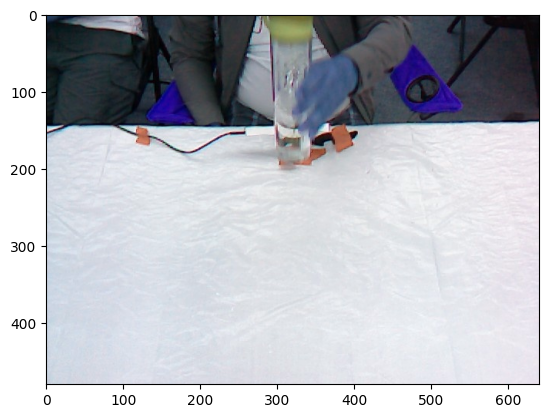

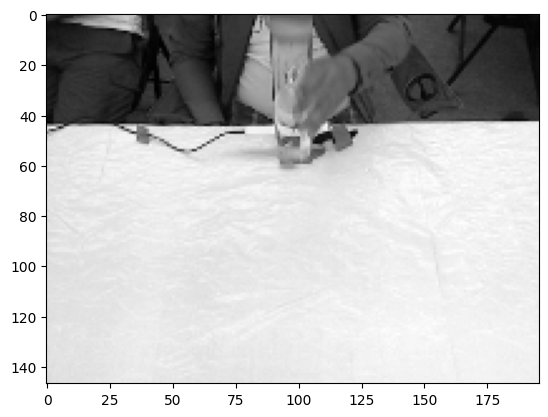

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
img_trial = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/raw_video/and_rgb/and_cup_rgb/00001535.jpg'
l = cv2.imread(img_trial)
print(l.shape[2])
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray_resized = cv2.resize(img_gray,(196,147))
    return img_gray_resized
plt.figure(0)
plt.imshow(l)
plt.figure(1)
img_procs = preprocess_image(img_trial)
plt.imshow(img_procs,'gray')
print(img_procs.dtype)

def jpg_files_to_npz(start: int, end: int, input_dir: str, output_dir: str,segment_id: int, subj_id: int):
    frames = []
    for i in range(start,end+1):
        jpg_name = str(i).zfill(8) + '.jpg'
        img = preprocess_image(os.path.join(input_dir,jpg_name))
        frames.append(img)
    frames = np.array(frames)
    outp_name_file = os.path.join(output_dir,f'S{subj_id}_segment_' + str(segment_id).zfill(3))
    np.savez(outp_name_file, video = frames)

start_, end_ = 45, 161
input_dir_ = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/raw_video/and_rgb/and_cup_rgb/'
output_dir_ = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/video/cup_drink/'
segment_id_ = 0 + 1
sub_id_ = 4
jpg_files_to_npz(start = start_, end = end_, input_dir = input_dir_, output_dir = output_dir_, segment_id = segment_id_, subj_id = sub_id_)

In [23]:
n_frames = 117
n_steps = 22
rate = n_frames/n_steps
(np.arange(1,n_steps+1)*rate -1).astype(np.uint8)

array([  4,   9,  14,  20,  25,  30,  36,  41,  46,  52,  57,  62,  68,
        73,  78,  84,  89,  94, 100, 105, 110, 116], dtype=uint8)

In [41]:
video_file = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/video/cup_drink/S4_segment_001.npz'
p = np.load(video_file,allow_pickle=True)['video']
print(len(p))
def load_npz_video_with_T_frames(file_name,n_steps):
    all_frames_img = np.load(file_name, allow_pickle = True)['video']
    n_frames = len(all_frames_img)
    print(f'Number of frames: {n_frames}')
    rate = n_frames/n_steps
    idxs = (np.arange(1,n_steps+1) * rate - 1).astype(np.uint8)
    print(f'Indices: {idxs}')
    final_image = all_frames_img[idxs]
    return final_image

p_cropped = load_npz_video_with_T_frames(video_file,22)
"""
fig, axs = plt.subplots(4,6,figsize=(25,20))
for frame in range(22):
    axs.flatten()[frame].imshow(p_cropped[frame],'gray')
    axs.flatten()[frame].axis('off')
plt.tight_layout()

#plt.imshow(p_cropped[0],'gray')
"""

117
Number of frames: 117
Indices: [  4   9  14  20  25  30  36  41  46  52  57  62  68  73  78  84  89  94
 100 105 110 116]


"\nfig, axs = plt.subplots(4,6,figsize=(25,20))\nfor frame in range(22):\n    axs.flatten()[frame].imshow(p_cropped[frame],'gray')\n    axs.flatten()[frame].axis('off')\nplt.tight_layout()\n\n#plt.imshow(p_cropped[0],'gray')\n"

In [43]:
import numpy as np
class load_npz_vid_with_T_frames:
    def __init__(self,time_steps):
        self.T  = time_steps

    def __call__(self,file_name):
        all_frames_img = np.load(file_name, allow_pickle = True)['video']
        n_frames = len(all_frames_img)
        print(f'Number of frames: {n_frames}')
        rate = n_frames/self.T 
        idxs = (np.arange(1,self.T+1) * rate - 1).astype(np.uint8)
        print(f'Indices: {idxs}')
        final_image = all_frames_img[idxs]
        return final_image
    
load_npz_vid = load_npz_vid_with_T_frames(22)
p_cropped2 = load_npz_vid(video_file)
print(np.all(p_cropped == p_cropped2))

Number of frames: 117
Indices: [  4   9  14  20  25  30  36  41  46  52  57  62  68  73  78  84  89  94
 100 105 110 116]
True


In [49]:
mad_classes = {
  0: "cup_drink",
  1: "cup_pound",
  2: "cup_shake",
  3: "cup_move",
  4: "cup_pour",
  5: "stone_pound",
  6: "stone_move",
  7: "stone_play",
  8: "stone_grind",
  9: "stone_carve",
  10: "sponge_squeeze",
  11: "sponge_flip",
  12: "sponge_wash",
  13: "sponge_wipe",
  14: "sponge_scratch",
  15: "spoon_scoop",
  16: "spoon_stir",
  17: "spoon_hit",
  18: "spoon_eat",
  19: "spoon_sprinkle",
  20: "knife_cut",
  21: "knife_chop",
  22: "knife_poke a hole",
  23: "knife_peel",
  24: "knife_spread",
}
print(list(mad_classes.values()))

class_to_idx = {cls_name: i  for i,cls_name in mad_classes.items()}
print(class_to_idx)

['cup_drink', 'cup_pound', 'cup_shake', 'cup_move', 'cup_pour', 'stone_pound', 'stone_move', 'stone_play', 'stone_grind', 'stone_carve', 'sponge_squeeze', 'sponge_flip', 'sponge_wash', 'sponge_wipe', 'sponge_scratch', 'spoon_scoop', 'spoon_stir', 'spoon_hit', 'spoon_eat', 'spoon_sprinkle', 'knife_cut', 'knife_chop', 'knife_poke a hole', 'knife_peel', 'knife_spread']
{'cup_drink': 0, 'cup_pound': 1, 'cup_shake': 2, 'cup_move': 3, 'cup_pour': 4, 'stone_pound': 5, 'stone_move': 6, 'stone_play': 7, 'stone_grind': 8, 'stone_carve': 9, 'sponge_squeeze': 10, 'sponge_flip': 11, 'sponge_wash': 12, 'sponge_wipe': 13, 'sponge_scratch': 14, 'spoon_scoop': 15, 'spoon_stir': 16, 'spoon_hit': 17, 'spoon_eat': 18, 'spoon_sprinkle': 19, 'knife_cut': 20, 'knife_chop': 21, 'knife_poke a hole': 22, 'knife_peel': 23, 'knife_spread': 24}


In [6]:
import os
events_np_root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/events_np'
items_file_list = sorted([it.name for it in os.scandir(events_np_root) if it.is_dir()] )
for item in items_file_list:
    for action in MAD.mylistdir(os.path.join(events_np_root,item)):
        new_dir = os.path.join(events_np_root,item + '_' + action)
        #os.mkdir(new_dir)
        for sample in sorted(os.listdir(os.path.join(events_np_root,item,action))):
            origin = os.path.join(events_np_root,item,action,sample)
            print('Origin file: ',sample)
            destination = os.path.join(new_dir,sample)
         #   shutil.copy(origin,destination)

Origin file:  s1_segment_001.npy
Origin file:  s1_segment_006.npy
Origin file:  s1_segment_011.npy
Origin file:  s1_segment_016.npy
Origin file:  s1_segment_021.npy
Origin file:  s2_segment_001.npy
Origin file:  s2_segment_006.npy
Origin file:  s2_segment_011.npy
Origin file:  s2_segment_016.npy
Origin file:  s2_segment_021.npy
Origin file:  s3_segment_001.npy
Origin file:  s3_segment_006.npy
Origin file:  s3_segment_011.npy
Origin file:  s3_segment_016.npy
Origin file:  s3_segment_021.npy
Origin file:  s4_segment_001.npy
Origin file:  s4_segment_006.npy
Origin file:  s4_segment_011.npy
Origin file:  s4_segment_016.npy
Origin file:  s4_segment_021.npy
Origin file:  s5_segment_001.npy
Origin file:  s5_segment_006.npy
Origin file:  s5_segment_011.npy
Origin file:  s5_segment_016.npy
Origin file:  s5_segment_021.npy
Origin file:  s1_segment_004.npy
Origin file:  s1_segment_009.npy
Origin file:  s1_segment_014.npy
Origin file:  s1_segment_019.npy
Origin file:  s1_segment_024.npy
Origin fil

In [59]:
import os 
import numpy as np
correct_example = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/events_np/train/camel/user01_indoor_0.npz'
correct_example2 = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/events_np/train/1/user01_lab_0.npz'
trial_example = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/events_np/knife/cut/s1_segment_006.npy'

k = np.load(correct_example,allow_pickle=True)
k2 = np.load(correct_example2,allow_pickle=True)
k3 = np.load(trial_example,allow_pickle=True).item()
print(k3['ts']*1e-6)
print(np.unique(k2['p']))
k3['p'][k3['p'] == -1] = 0
print(np.unique(k3['p']))

[2502.144653 2502.144725 2502.144833 ... 2506.702978 2506.703213
 2506.703927]
[0 1]
[0 1]


In [7]:
import os 
import numpy as np
direc = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/events_np/'

def mylistdir(root):
    return [it.name for it in os.scandir(root) if it.is_dir()] 



for action in mylistdir(direc):
    for sample in os.listdir(os.path.join(direc,action)):
        if sample.endswith('.npy'):
            k = np.load(os.path.join(direc,action,sample),allow_pickle=True).item()
            if k['max_width'] != 160 or k['max_height']!=180:
                print('Error')

#k2 = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/events_np/knife/cut/s2_segment_021.npy',allow_pickle=True).item()
#print(k2)

s5_segment_021.npy
s2_segment_021.npy
s1_segment_016.npy
s3_segment_021.npy
s1_segment_001.npy
s1_segment_011.npy
s4_segment_021.npy
s1_segment_006.npy
s3_segment_016.npy
s4_segment_006.npy
s1_segment_021.npy
s3_segment_001.npy
s4_segment_011.npy
s3_segment_011.npy
s4_segment_001.npy
s3_segment_006.npy
s4_segment_016.npy
s5_segment_001.npy
s2_segment_011.npy
s5_segment_016.npy
s2_segment_006.npy
s5_segment_006.npy
s2_segment_016.npy
s5_segment_011.npy
s2_segment_001.npy
s2_segment_024.npy
s5_segment_009.npy
s2_segment_019.npy
s5_segment_019.npy
s2_segment_009.npy
s5_segment_024.npy
s3_segment_009.npy
s4_segment_019.npy
s1_segment_014.npy
s4_segment_024.npy
s3_segment_024.npy
s1_segment_004.npy
s3_segment_019.npy
s4_segment_009.npy
s4_segment_004.npy
s3_segment_014.npy
s1_segment_009.npy
s1_segment_019.npy
s1_segment_024.npy
s4_segment_014.npy
s3_segment_004.npy
s2_segment_004.npy
s5_segment_014.npy
s2_segment_014.npy
s5_segment_004.npy
s2_segment_018.npy
s5_segment_008.npy
s5_segment_0

In [13]:
h,m,a = 'hola_adios'.split('_')
print(h)
print(m)
print(a)

ValueError: not enough values to unpack (expected 3, got 2)

In [45]:
import os
import json
import shutil
dataset_path = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD'
dir_and_cup = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/raw_video/and_rgb/and_cup_rgb'
cup_json = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD/mad-meta-data 2/cup_db.json'
with open(cup_json,'r') as f:
    dataset_info = json.load(f)    
dataset_info[0]
#frames_file = np.array([int(it.name[:-4]) for it in os.scandir(dir_and_cup) if it.name.endswith('.jpg')])
#os.mkdir(os.path.join(dataset_path,'video'))
i = 0
for i,data in enumerate(dataset_info):
    if data['subject']=='and' and data['object'] == 'cup':
        particular_root = os.path.join(dataset_path, 'video', data['subject'], data['object'] + '_' + str(data['attention_type']), str(i) )
        if not os.path.exists(particular_root):
            os.makedirs(particular_root)
        startf,endf = data['start_frame'],data['end_frame']
        for i in range(startf,endf+1):
            jpg_name = str(i).zfill(8) + '.jpg'
            origin = os.path.join(dir_and_cup,jpg_name)
            destination = os.path.join(particular_root,jpg_name)
            shutil.copy(origin, destination)

print(i)

#for frame in frames_file:
#    if frame.endswith('.jpg'):
#        number = int(frame[:-4])
#print(frames_path)


124


In [35]:
'hola y adios'.removeprefix()

TypeError: str.removeprefix() takes exactly one argument (0 given)

In [29]:
import torch
from torch import nn
torch.manual_seed(0)
rnn = nn.GRU(input_size= 512, hidden_size = 300, num_layers = 2,batch_first = True)
input = torch.randn(2, 16, 512)
#h0 = torch.zeros(2,2, 300)
output, hn = rnn(input)#, h0)
print(output.shape)
print(hn.shape)
print(output)

torch.Size([2, 16, 300])
torch.Size([2, 2, 300])
tensor([[[ 4.9892e-02,  1.0634e-01, -1.3047e-01,  ..., -2.6037e-02,
           5.7167e-02,  1.4014e-01],
         [ 7.2955e-02,  2.5836e-02, -1.8706e-01,  ...,  4.8865e-02,
           6.7697e-02,  1.3224e-01],
         [ 1.9523e-01,  5.9557e-02, -2.7799e-01,  ...,  6.0343e-02,
           1.1233e-01,  1.9832e-01],
         ...,
         [-2.6188e-01,  6.7729e-02, -1.9754e-01,  ...,  6.8008e-02,
           5.9560e-02,  7.0024e-02],
         [-2.6869e-01,  6.2970e-02, -1.7273e-01,  ...,  4.1432e-02,
           9.7655e-02,  1.6261e-02],
         [-1.5602e-01, -5.3494e-02, -1.0596e-01,  ...,  7.7389e-02,
           7.1642e-02,  3.2689e-02]],

        [[-1.8214e-01, -6.6821e-02, -7.1104e-02,  ..., -8.5070e-02,
          -1.1758e-01,  8.3952e-02],
         [-7.6202e-02,  1.7758e-04, -1.4540e-01,  ..., -1.4415e-01,
           3.6195e-02,  1.7928e-01],
         [-9.2926e-02,  2.5360e-02, -2.0859e-01,  ..., -2.7118e-01,
           7.0574e-02,  1.8

In [ ]:
import numpy as np
import torch
import random
seed = 310
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.mps.deterministic = True
torch.backends.cuda.deterministic = True
np.random.randn(2)

In [1]:
import torch
from models import myDVSGestureANN,myDVSGestureNet, myDVSGesture3DANN
from spikingjelly.activation_based import functional, surrogate, neuron
from utils import loading_data
import os
src_root = os.getcwd()
data_root = os.path.join(os.path.dirname(src_root),'data')
data_animals = os.path.join(data_root,'DVS_Animals_Dataset')
data_gesture = os.path.join(data_root,'DVS_Gesture_dataset')
data_dailyactions = os.path.join(data_root,'DVS_DailyAction_dataset')
data_actrec = os.path.join(data_root,'DVS_ActionRecog_dataset')

data_set,_,sizexy = loading_data(input_data = data_animals, time_step = 22,datatype='video',tr_tst_split = False)
net = myDVSGestureANN(output_size=19,input_sizexy=sizexy,softm=True)
net2 = myDVSGestureANN(output_size=19,input_sizexy=sizexy,softm=False)
net3 = myDVSGesture3DANN(output_size = 19,input_sizexy = sizexy,num_frames = 22,softm = True)
#net3 = myDVSGestureNet(input_sizexy=sizexy,spiking_neuron=neuron.LIFNode,output_size=19, surrogate_function=surrogate.ATan(), detach_reset=True)
functional.set_step_mode(net3, 'm')
#batch_sample = torch.randn(8,16,2,128,128)
#out_batcsamp = net(batch_sample)
#print(out_batcsamp.shape)

print(net3.conv_fc)
trainloader = torch.utils.data.DataLoader(
                data_set, 
                 batch_size=8)


for i,(frame,label) in enumerate(trainloader):
    if i == 0:
        print('Forma de cada batch de frames:',frame.shape)
        x = net(frame)
        x2 = net2(frame)
        x3 = net3(frame)
        print(x.shape)
        print(x2.shape)
        print(x3.shape)
        print(torch.sum(x[0,:]))
        print(torch.sum(x2[0,:]))
        #print(x3.shape)
    else:
        break

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_22] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_22] already exists.
Sequential(
  (0): Conv3d(1, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (1): BatchNorm3d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  (4): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (5): BatchNorm3d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  (8): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (9): BatchNorm3d(96, eps=1e-05, momentum=0.1, affin

In [41]:
#net_name = 'DVSG_net'
net_name = 'RDVSG_ANN'
if not net_name.endswith('ANN'):
    print('Spiking model')

In [1]:
import numpy as np
from utils import load_net
names = ['ActRec','Animals','DailyAct','Gesture']
nclasses = [10,19,12,11]
sizexy = [(260//2, 346//2)] + [(128,128)] * 3
net_names = ['resnet18','DVSG_net','DVSG_RANN','DVSG_ANN','DVSG_3DANN']
neuron_types = ['LIF','PLIF']

for name, nclass, sizexy in zip(names, nclasses, sizexy):
    print(f'--------Dataset {name}--------')
    for net_name in net_names:
        print(f' Net: {net_name}')
        if not net_name.endswith('ANN'):
            for neur_type in neuron_types:
                print(f'  {neur_type} neuron',end = '')
                net = load_net(net_name=net_name,n_classes=nclass,size_xy=sizexy,neuron_type=neur_type)
                trainable_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
                print('   %.6e'%trainable_params)
        else:
            for classif in [True,False]:
                print(f'  Softmax: ',end = '') if classif else print(f'  AvgPool: ',end = '')
                net = load_net(net_name = net_name, n_classes = nclass, size_xy = sizexy, neuron_type = neur_type, num_frames = 22, softm = classif)
                trainable_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
                print('   %.6e'%trainable_params)

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--------Dataset ActRec--------
 Net: resnet18
  LIF neuron   1.117851e+07
  PLIF neuron   1.117853e+07
 Net: DVSG_net
  LIF neuron   1.955940e+06
  PLIF neuron   1.955947e+06
 Net: DVSG_RANN
  Softmax:    2.149298e+06
  AvgPool:    2.148288e+06
 Net: DVSG_ANN
  Softmax:    1.908618e+06
  AvgPool:    1.954788e+06
 Net: DVSG_3DANN
  Softmax:    1.106969e+07
  AvgPool:    1.111586e+07
--------Dataset Animals--------
 Net: resnet18
  LIF neuron   1.118312e+07
  PLIF neuron   1.118314e+07
 Net: DVSG_net
  LIF neuron   1.739966e+06
  PLIF neuron   1.739973e+06
 Net: DVSG_RANN
  Softmax:    2.263993e+06
  AvgPool:    2.260364e+06
 Net: DVSG_ANN
  Softmax:    1.651091e+06
  AvgPool:    1.738814e+06
 Net: DVSG_3DANN
  Softmax:    8.911619e+06
  AvgPool:    8.999342e+06
--------Dataset DailyAct--------
 Net: resnet18
  LIF neuron   1.117953e+07
  PLIF neuron   1.117955e+07
 Net: DVSG_net
  LIF neuron   1.704056e+06
  PLIF neuron   1.704063e+06
 Net: DVSG_RANN
  Softmax:    1.958156e+06
  AvgPool

In [21]:
from spikingjelly.activation_based.layer import VotingLayer
import torch
import torch.nn.functional as F
torch.manual_seed(3)
l = torch.randn(8, 12*10)
VotLay = VotingLayer(10,step_mode='s')
m = VotLay(l)
m2 = F.avg_pool1d(l.unsqueeze(1), 10, 10).squeeze(1)
VotLayerANN = torch.nn.AvgPool1d(10,10)
m3 = VotLayerANN(l)
print(m.shape)
print(m2.shape)
print(m3.shape)
print(torch.all(m2==m3) and torch.all(m==m2))

torch.Size([8, 12])
torch.Size([8, 12])
torch.Size([8, 12])
tensor(True)


In [13]:
import numpy as np
events_reconst =np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/events_np/train/bird/user00_indoor_0.npz')
print(events_reconst['t'][0]*1e-6,events_reconst['t'][-1]*1e-6)

2365.205212 2369.949438


In [22]:
import torch
import sys 
sys.path.append('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/my_rpg_e2vid')
from my_rpg_e2vid.model.model import *
raw_model = torch.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/my_rpg_e2vid/pretrained/E2VID_lightweight.pth.tar',map_location=torch.device('cpu'))
arch = raw_model['arch']

try:
    model_type = raw_model['model']
except KeyError:
    model_type = raw_model['config']['model']
print(arch)
# instantiate model
model = eval(arch)(model_type)
# load model weights
model.load_state_dict(raw_model['state_dict'])

E2VIDRecurrent
Using TransposedConvLayer (fast, with checkerboard artefacts)


<All keys matched successfully>

In [1]:
import numpy as np
import torch
import random
seed = 310
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.mps.deterministic = True
torch.backends.cuda.deterministic = True
np.random.randn(2)

array([0.5353452 , 1.01156325])

In [8]:
from Laboratory import randnumber
randnumber()

array([0.5353452 , 1.01156325])

In [2]:
import numpy as np
import os
root_np = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/chenjieneng_1.1.npz'
data_name_root = root_np
for n in range(4):
    data_name_root = os.path.dirname(data_name_root)
#print(data_name_root)
events_dict = np.load(root_np)
times_us = events_dict['t'].astype(np.float32)
duration_us = (times_us[-1]-times_us[0])/22 #50ms that is equa l to 50*1e3 us
total_event_list = np.array([[t,x,y,pol] for t,x,y,pol in zip(times_us,events_dict['x'],events_dict['y'],events_dict['p'])],dtype=np.float32)
last_stamp = times_us[0]
mask = np.logical_and(times_us >= last_stamp,times_us < (last_stamp + duration_us))
print(total_event_list[mask].dtype)

float32


In [18]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_num26_splitby_exp_decay_tau0_8_scale50/train/arm crossing/chenjieneng_1.1.npz')
print(k.shape)

AttributeError: 'NpzFile' object has no attribute 'shape'

In [3]:
import torch
from my_rpg_e2vid.utils.inference_utils import events_to_voxel_grid_pytorch
device = torch.device('mps')
k = events_to_voxel_grid_pytorch(total_event_list,20,346,260,device)

In [1]:
from my_rpg_e2vid.utils.event_readers import MyFixedDurationEventReader
root_np2 = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/events_np/train/bird/user00_indoor_0.npz'
wind_iterator = MyFixedDurationEventReader(root_np2,time_steps=22)
for i,wind in enumerate(wind_iterator):
    print(i,' ',len(wind))
    if i == 21:
        #print(np.all(wind == total_event_list[mask]))
        k = wind[-1]

Will use fixed duration event windows of size 215.65 ms
0   27014
1   32309
2   37766
3   36146
4   30795
5   25300
6   24362
7   26648
8   37403
9   36529
10   28271
11   26044
12   29428
13   18880
14   24816
15   19975
16   16555
17   34429
18   37222
19   29931
20   28076
21   35384


In [10]:
print(len(total_event_list)/len(total_event_list[mask]))

124.72688787185355


In [51]:
_loader = lambda file_name: np.load(file_name, allow_pickle=True)['arr_0'].astype(np.float32)
p_new = _loader('/Users/marcosesquivelgonzalez/Desktop/prueba/user00_indoor_0.npz')
print(np.all(p_new == p['arr_0'].astype(np.float32)))
#p['arr_0'].min()

True


In [48]:
import numpy as np
p = np.load('/Users/marcosesquivelgonzalez/Desktop/prueba/user00_indoor_0.npz')
p_events = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/chenjieneng_1.1.npz')
dir(p)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_files',
 'allow_pickle',
 'close',
 'f',
 'fid',
 'files',
 'get',
 'items',
 'keys',
 'max_header_size',
 'pickle_kwargs',
 'values',
 'zip']

In [1]:
from utils import loading_data
from Datasets import DVSActionRecog,DVS128Gesture
import os
src_root = os.getcwd()
data_root = os.path.join(os.path.dirname(src_root),'data')
data_animals = os.path.join(data_root,'DVS_Animals_Dataset')
data_gesture = os.path.join(data_root,'DVS_Gesture_dataset')
data_dailyactions = os.path.join(data_root,'DVS_DailyAction_dataset')
data_actrec = os.path.join(data_root,'DVS_ActionRecog_dataset')
#train, test ,_,_  = loading_data(input_data=data_actrec,time_step = 16,splitmeth = 'number')
#train2,_,_  = loading_data(input_data=data_dailyactions, datatype='event',tr_tst_split=False)
train2_frames,_,_ = loading_data(input_data=data_animals,datatype='video',time_step=3,tr_tst_split=False)
train2_frames,_,_ = loading_data(input_data=data_dailyactions,datatype='video',time_step=3,tr_tst_split=False)
train2_frames,_,_ = loading_data(input_data=data_gesture,datatype='video',time_step=3,tr_tst_split=False)
train2_frames,_,_ = loading_data(input_data=data_actrec,datatype='video',time_step=3,tr_tst_split=False)
#train2_frames_exp,_,_ = loading_data(input_data=data_dailyactions,time_step=16,splitmeth='exp_decay',tr_tst_split=False)
#train3, test3 ,_,_  = loading_data(input_data=data_actrec,datatype='frame',time_step = 16, splitmeth = 'number')
#train3, test3 ,_,_  = loading_data(input_data=data_animals,time_step = 22, splitmeth = 'exp_decay')
#train3, test3 ,_,_  = loading_data(input_data=data_animals,time_step = 22, splitmeth = 'exp_decay')
#train_set = DVSActionRecog(root = data_actrec,train = True, data_type = 'event') 
#DVSActionRecog.get_H_W()

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3/test].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3/test/cat].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3/test/butterfly].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3/test/dog].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3/test/dolphin].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3/test/zebra].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_number_3/test/sheep].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/video_nu

In [41]:
file_raro = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/events_np/train/pick/xd12216.npz'
file_frame_raro = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_num16_splitby_exp_decay_tau0_4_scale50/train/pick/xd12216.npz'
file_frame_bien = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_num16_splitby_exp_decay_tau0_4_scale50/train/pick/xd12217.npz'
events_raro = np.load(file_raro)
frame_raro = np.load(file_frame_raro)
frame_bien = np.load(file_frame_bien)
np.unique(frame_raro['frames'])
#frame_bien['frames']

array([                  0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,                  14,
                        15,                  16,                  17,
                        18,                  19,                  20,
                        21,                  22,                  23,
                        24,                  25,                  26,
                        27,                  28,                  29,
                        30,                  31,                  32,
                        33,                  34,                  35,
                        36,                  37,                  38,
                        39,                  40,                  41,
                    

In [23]:
import numpy as np
for events,_ in train2:
    if events['t'][0] != events['t'].min():
        print(events['t'])

print('Frames: ')
for frame, _ in train2_frames:
    if np.all(frame == 0):
        print('Error')

print('Frames_exp: ')
for frame, _ in train2_frames_exp:
    if np.any(frame > 50):
        print('Error')


[4293250523 4293250533 4293250552 ...    1216459    1216460    1216584]
Frames: 
Frames_exp: 
Error


In [4]:
train2[0][0].shape

(16, 2, 130, 173)

In [2]:
train4, _ ,_,_  = loading_data(input_data=AR_file,time_step = 25,splitmeth = 'exp_decay')


232 232 232
59 59 59


In [4]:
print(len(train),len(train2),len(train3))
print(len(test),len(test2),len(test3))

232 232 232
59 59 59


In [3]:
print(len(train),len(train2),len(train3),len(train4))#Lo ideal es que salga 235

233 230 235 231


In [20]:
from spikingjelly.datasets import play_frame
import os
from Datasets import MAD
MAD_root = os.path.join(os.path.dirname(os.getcwd()),'data','MAD_dataset')

MAD_frames = MAD(root = MAD_root, data_type = 'frame',split_by= 'exp_decay', frames_number = 22)

root_gifs = os.path.join(os.getcwd(),'gifs_MAD_frames_exp_decay')
#os.mkdir(root_gifs)

print(len(MAD_frames))
k = 0
for i,sample in enumerate(MAD_frames):
    #print(sample[0][:,:,:-20,:].shape)
    play_frame(sample[0][:,:,:-20,:], save_gif_to = os.path.join(root_gifs,f'sample_{i}.gif'))

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD_dataset/frames_num22_splitby_exp_decay_tau0_8_scale50] already exists.
624
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_MAD_frames_exp_decay/sample_0.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_MAD_frames_exp_decay/sample_1.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_MAD_frames_exp_decay/sample_2.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_MAD_frames_exp_decay/sample_3.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_MAD_frames_exp_decay/sample_4.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_MAD_frames_exp_decay/sample_5.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_MAD_frames_exp_decay/sample_6.gif].
Save frames to [/Users/marcosesqui

In [1]:
import os
import numpy as np
from Datasets import MAD
from spikingjelly.datasets import play_frame
from event_integration_to_frame import myintegrate_events_by_fixed_frames_number
events = MAD.load_events_np('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD_dataset/events_np/cup_drink/s1_segment_006.npy')
print(events)
frame_integrat = myintegrate_events_by_fixed_frames_number(events=events,split_by='exp_decay',frames_num=22,H=128,W=128)
play_frame(frame_integrat, save_gif_to = os.path.join(os.getcwd(),'prueba_recorte_resized.gif'))

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'x': array([86, 31, 41, ..., 92, 78, 84], dtype=uint8), 'y': array([60, 83, 54, ..., 58, 58, 50], dtype=uint8), 'p': array([0, 1, 0, ..., 0, 0, 0], dtype=int16), 'max_width': 160, 'max_height': 180, 't': array([1593669411, 1593669502, 1593669519, ..., 1597428502, 1597428714,
       1597429116], dtype=uint32)}
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/prueba_recorte_resized.gif].


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from Datasets import MAD
from IPython.display import clear_output
raw_video_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD_dataset/raw_video'

fig,ax = plt.subplots()
plt.title('frames')

for subject in [it.name for it in os.scandir(raw_video_dir) if it.is_dir()]:
    for item in [it.name for it in os.scandir(os.path.join(raw_video_dir,subject)) if it.is_dir()]:
        k = 0
        for i,jpg_name in enumerate(sorted([it.name for it in os.scandir(os.path.join(raw_video_dir,subject,item)) if it.name.endswith('.jpg')])):
            if k == 4:
                frame_file = os.path.join(raw_video_dir,subject,item,jpg_name)
                img = cv2.imread(frame_file,0)
                img_resiz = img[:-40,110:-90]
                plt.axis('off')
                plt.title(frame_file)
                plt.text(10,img_resiz.shape[0]*0.8,f'image shape: {img_resiz.shape}')
                plt.imshow(img_resiz,'gray')
                plt.pause(0.00001)
                clear_output(wait=True)
                k = 0
            k += 1



KeyboardInterrupt: 

(450, 450)
(128, 128)


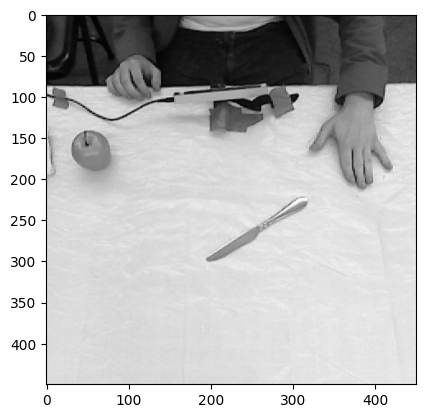

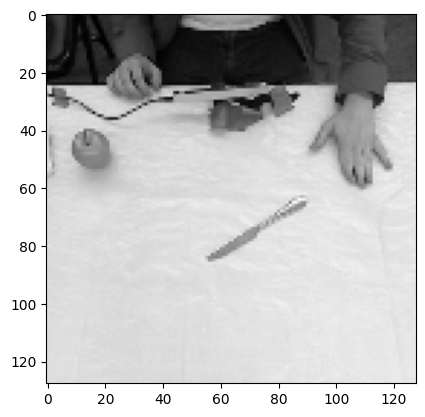

In [2]:
from Datasets import MAD
import cv2
import matplotlib.pyplot as plt
file = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/MAD_dataset/raw_video/kos_rgb/kos_knife_rgb/00005285.jpg'
img = cv2.imread(file,0)
img2 = MAD.preprocess_and_load_jpg(file)
img_resized = img[:-30,99:-91]
plt.figure()
plt.imshow(img_resized,'gray')
plt.figure()
plt.imshow(img2,'gray')
print(img_resized.shape)
print(img2.shape)

In [11]:
fail2[-1]-fail2[0]

5948746

In [7]:
fail2 = events_f2['t']
print(fail2[0],fail2[-1])

50133294 56082040


In [5]:
import os
import numpy as np
from event_integration_to_frame import myintegrate_events_by_fixed_frames_number
from spikingjelly.datasets import integrate_events_by_fixed_frames_number, play_frame, integrate_events_segment_to_frame
fine = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/kicking/chenjieneng_3.1.npz'
fail_1 = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/picking up/zhangliming_4.2.npz'
fail_2 = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/miaoshu_1.3.npz'
events_fine = np.load(fine)
events_f1 = np.load(fail_1)
events_f2 = np.load(fail_2)
#events_f3 = np.load(fail_3)
print(events_f2['x'])
#k_fine = integrate_events_by_fixed_frames_number(events = events_fine,split_by = 'time', frames_num = 26, H = 260, W = 346)
k1_number = myintegrate_events_by_fixed_frames_number(events = events_f1,split_by = 'number', frames_num = 10, H = 260, W = 346)
#k1 = integrate_events_by_fixed_frames_number(events = events_f1,split_by = 'time', frames_num = 16, H = 260, W = 346)
k2 = myintegrate_events_by_fixed_frames_number(events = events_f1,split_by = 'time', frames_num = 26, H = 260, W = 346)
print(np.all(k1==k2))
#k = myintegrate_events_by_fixed_frames_number(events = events_f2,split_by='exp_decay', frames_num = 26, H = 260, W = 346, factor_tau = 0.8, scale_factor = 50)
#print(k.shape)
#integrate_events_by_fixed_frames_number_bydecay(events = events_DA, frames_num = 26, H = 128, W = 128, factor_tau = 0.8, scale_factor = 50)

[130 194  36 ...   5  51  21]
t_0: 184832359, t_fin: 190679232
 t_i:  184832359, t_fi: 185057238  False
 t_i:  185057238, t_fi: 185282117  False
 t_i:  185282117, t_fi: 185506996  False
 t_i:  185506996, t_fi: 185731875  False
 t_i:  185731875, t_fi: 185956754  False
 t_i:  185956754, t_fi: 186181633  False
 t_i:  186181633, t_fi: 186406512  False
 t_i:  186406512, t_fi: 186631391  False
 t_i:  186631391, t_fi: 186856270  False
 t_i:  186856270, t_fi: 187081149  False
 t_i:  187081149, t_fi: 187306028  False
 t_i:  187306028, t_fi: 187530907  False
 t_i:  187530907, t_fi: 187755786  False
 t_i:  187755786, t_fi: 187980665  False
 t_i:  187980665, t_fi: 188205544  False
 t_i:  188205544, t_fi: 188430423  False
 t_i:  188430423, t_fi: 188655302  False
 t_i:  188655302, t_fi: 188880181  False
 t_i:  188880181, t_fi: 189105060  False
 t_i:  189105060, t_fi: 189329939  True
 t_i:  189329939, t_fi: 189554818  True
 t_i:  189554818, t_fi: 189779697  True
 t_i:  189779697, t_fi: 190004576  Fal

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:58: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:58: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:58: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/var/folders/ws/h7295dnd2171nw3lr_bkwk380000gn/T/ipykernel_39401/3753421159.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.all(k1==k2))


In [6]:
from spikingjelly.datasets import integrate_events_by_fixed_frames_number, play_frame, integrate_events_segment_to_frame
play_frame(x = k2,save_gif_to = os.path.join(os.getcwd(),'pruebaaaa2_time.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/pruebaaaa2_time.gif].


In [21]:
from spikingjelly.datasets import integrate_events_by_fixed_frames_number, play_frame, integrate_events_segment_to_frame
p = integrate_events_segment_to_frame(events_f2['x'],events_f2['y'],events_f2['p'], H = 260, W = 346, j_l = 54, j_r = 54)
print(np.all(p==0))

True


In [22]:
p = np.array([3,4,5])
len(p[np.array([False,False,False])])

0

In [ ]:
import numpy as np
from event_integration_to_frame import integrate_events_by_fixed_frames_number_bydecay
DailyAct_np_file = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/events_np/train/climb/cc2112.npz'
ActRec_npfile = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/chenjieneng_1.1.npz'
events_AR = np.load(ActRec_npfile)
events_DA = np.load(DailyAct_np_file)
integrate_events_by_fixed_frames_number_bydecay(events = events_AR, frames_num = 26, H = 260, W = 346, factor_tau = 0.8, scale_factor = 50)
#integrate_events_by_fixed_frames_number_bydecay(events = events_DA, frames_num = 26, H = 128, W = 128, factor_tau = 0.8, scale_factor = 50)

array([[[[16, 29, 44, ..., 23,  0,  0],
         [ 0,  0, 34, ...,  0,  0,  0],
         [42, 35, 47, ...,  0,  0,  0],
         ...,
         [39,  0, 43, ...,  0, 49,  0],
         [ 0, 23, 44, ...,  0,  0,  0],
         [45,  0,  0, ...,  0, 49, 25]],

        [[16, 49, 43, ..., 24,  0,  0],
         [ 0,  0, 34, ...,  0,  0,  0],
         [38, 32, 48, ...,  0,  0,  0],
         ...,
         [38,  0, 42, ...,  0, 46,  0],
         [ 0, 22, 43, ...,  0,  0,  0],
         [38,  0,  0, ...,  0, 48, 25]]],


       [[[ 4, 43, 31, ...,  6,  0,  0],
         [18, 17, 45, ..., 24,  0,  0],
         [46, 36, 49, ...,  0,  0,  0],
         ...,
         [11,  0, 39, ...,  0, 23,  0],
         [ 0, 30, 12, ...,  0, 33,  0],
         [37,  0,  0, ...,  0, 14,  7]],

        [[ 4, 49, 30, ...,  7,  0,  0],
         [18, 16, 44, ...,  0,  0,  0],
         [47, 34, 48, ...,  0,  0,  0],
         ...,
         [11,  0, 37, ...,  0, 22,  0],
         [ 0, 32, 12, ...,  0, 41,  0],
         [36,  0

In [ ]:
t = np.array([4])
t = t.astype('uint32')
t = (t*1e-4).astype('uint32')

In [ ]:
events_DA['t']#.astype('uint32')

array([593159078, 593167417, 593167774, ..., 597054624, 597054710,
       597054729], dtype=uint32)

In [ ]:
import numpy as np
np.mean(results['hola'])

4.0

In [ ]:
from Laboratory import loading_data
data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
data_set, n_classes, sizexy = loading_data(input_data=data_dir,tr_tst_split=False)

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.


In [ ]:
import numpy as np

In [ ]:
X  = [None]*len(data_set)
y = [None]*len(data_set)
for i,(sample,label) in enumerate(data_set):
    X[i] = sample
    y[i] = label
X = np.array(X)
y = np.array(y)

In [ ]:
X  = np.array([])
y = np.array([])
for sample,label in data_set:
    try:
        X = np.concatenate((X,sample))
        y = np.concatenate((y,sample))
    except:
        X = sample
        y = label

In [ ]:
X_1  = []
y_1 = []
for (sample,label) in (data_set):
    X_1.append(sample)
    y_1.append(label)
print(X_1[0].shape)

(16, 2, 128, 128)


In [ ]:
import torch

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf5 = StratifiedKFold(n_splits=5,shuffle=True,random_state=30)
labels = [sample[1] for sample in data_set]
for train_idx,test_idx in skf5.split(data_set, y = labels):
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(
                      data_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      data_set,
                      batch_size=10, sampler=test_subsampler)
    y_0_train = 0 
    for frame,label in trainloader:
        y_0_train += torch.sum(label ==0)
    y_0_test = 0 
    for frame,label in testloader:
        y_0_test += torch.sum(label ==0)  
    print(y_0_train,y_0_test)


tensor(96) tensor(25)
tensor(97) tensor(24)
tensor(97) tensor(24)
tensor(97) tensor(24)
tensor(97) tensor(24)


In [ ]:
import torch
gpu = False
device = ("cuda" if torch.cuda.is_available() else 'mps' if gpu else 'cpu')
print(device)

cpu


In [ ]:
import os 
import numpy as np
root_bend_data = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/extract/DailyAction/bend'
subjects = np.unique([file[:2] for file in os.listdir(root_bend_data) if file.endswith('.aedat')],return_counts=True)
print(subjects)

(array(['cc', 'gh', 'hk', 'hr', 'jc', 'jf', 'kx', 'ls', 'ps', 'sh', 'sy',
       'xc', 'xd', 'yn'], dtype='<U2'), array([ 6, 12, 12,  6,  6,  7,  6,  6, 12,  6,  6, 11, 18,  6]))


In [ ]:
import os 
import numpy as np
root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/events_np/train'
events_list = []
labels = sorted(it.name for it in os.scandir(root) if it.is_dir())
print(labels)
for i,label in enumerate(labels):
    label_subfolder = os.path.join(root,label)
    for file in os.listdir(label_subfolder):
        if file.endswith('.npz'):
            root_file = os.path.join(label_subfolder,file)
            events_list.append((np.load(root_file),i))
print(events_list)

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
[(<numpy.lib.npyio.NpzFile object at 0x291b53dd0>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5b590>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5b610>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5b750>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5ba10>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e59810>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e59d90>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5bc50>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5a290>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5ac10>, 0), (<numpy.lib.npyio.NpzFile object at 0x107ab82d0>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b42890>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b42c50>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b41b90>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b42d10>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b5cf90>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b5e590>, 0), (<numpy.lib.npyio.NpzFil

In [ ]:
events_list[0][0]['t']

array([46731035, 46731061, 46731069, ..., 50827498, 50827509, 50827533])

In [ ]:
dir(events_list[0][0])

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_files',
 'allow_pickle',
 'close',
 'f',
 'fid',
 'files',
 'get',
 'items',
 'keys',
 'max_header_size',
 'pickle_kwargs',
 'values',
 'zip']

# Experimento 1
Usando la red de spiking_jelly, es decir, DVSGesture_net probar su rendimiento en distintos datasets.


In [ ]:
import torch
cuda_available = torch.cuda.is_available()
print(cuda_available)

True


In [ ]:
import wandb

api = wandb.Api()

"""
username = wandb.run.entity
project = wandb.run.project
run_id = wandb.run.id
"""
run = api.run(f'tfm_datcom/Experimento1/ujyp55ue')
run.summary['max_test_acc'] = 0.5382 
run.update()

In [ ]:
if run.config['architecture']=='DVS_SNN':
    run.config['architecture'] = 'DVSG_net'
    print('Changes done')
    run.update()


Changes done


In [ ]:
import os
from sklearn.model_selection import train_test_split
end_files = '.aedat'
aedat_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/extract/Animals/'
aedats_list = [file for file in os.listdir(aedat_dir) if file.endswith(end_files)]
sublabels_list = [file.split('_')[1] for file in aedats_list] 
train, test = train_test_split(aedats_list,stratify=sublabels_list,test_size=0.2)
print(len(train),len(test))

47 12


In [ ]:
import numpy as np
root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset'
labeldef_root = os.path.join(root,'extract','SL-Animals-DVS_gestures_definitions.csv')
labels_load = np.loadtxt(labeldef_root,dtype=str,delimiter=',',skiprows=1)
labels_defs = dict()
for label in labels_load:
    labels_defs[label[1]] = int(label[0]) - 1
list(labels_defs.keys())

['cat',
 'dog',
 'camel',
 'cow',
 'sheep',
 'goat',
 'wolf',
 'squirrel',
 'mouse',
 'dolphin',
 'shark',
 'lion',
 'monkey',
 'snake',
 'spider',
 'butterfly',
 'bird',
 'duck',
 'zebra']

In [ ]:
from Laboratory import loading_data
root_animals = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset'
root_dailyactions = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'

data,_,_ = loading_data(root_dailyactions,tr_tst_split=False)

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


In [ ]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/events_np/train/butterfly/user01_indoor_0.npz')

In [ ]:
np.array(pyx)[posic]

array([[ 0,  0,  1],
       [ 0,  1,  2],
       [ 1,  1,  2],
       [ 1,  3,  4],
       [ 1,  8, 23],
       [ 1,  9,  2]])

0 0 1 1
0 1 2 0
1 1 2 3
1 3 4 4
1 8 23 7
1 9 2 8


In [ ]:
for p,y,x in uniq_values:
    print(p,y,x)

0 0 1
0 1 2
1 1 2
1 3 4
1 8 23
1 9 2


In [ ]:
import numpy as np
x = np.array([2,1,4,2,4,12,2,12,2])
y = np.array([1,0,3,1,3,8,9,8,9])
p = np.array([0,0,1,1,1,1,1,1,1])
print('Tamaño: ',len(x))
t = np.array([1,3,8,12,24,36,40,45,50])
#pyx = [(p_,y_,x_) for x_,y_,p_ in zip(x,y,p)]
#print('Array de valores xy: ',xy)
#print(np.unique(xy,axis=0))
#uniq_values, posic_inverted = np.unique(pyx[::-1],axis=0,return_index=True)
uniq_values, posic_inverted = np.unique(list(zip(x,y,p))[::-1],axis=0,return_index=True)
posic = len(x) - posic_inverted - 1
print('Unique values: ',uniq_values)
print('index_of values: ', posic)
print('X from unique values:',x_uniq)
print(uniq_values.shape)

Tamaño:  9
Unique values:  [[ 1  0  0]
 [ 2  1  0]
 [ 2  1  1]
 [ 2  9  1]
 [ 4  3  1]
 [12  8  1]]
index_of values:  [1 0 3 8 4 7]
X from unique values: [0 0 1 1 1 1]
(6, 3)


In [ ]:
x_uniq,y_uniq,z_uniq = uniq_values[:,0],uniq_values[:,1],uniq_values[:,2]
matriz = np.zeros((14,14,14),dtype=np.int64)
matriz[x_uniq,y_uniq,z_uniq] = t[posic]
print(matriz[2,9,1])

50


In [ ]:
l = np.array([2,1,4,2,5,23])
l_0 = 30
tau = 14
print(np.exp((l-l_0)/tau))
outputs = []
for l_i in l:
    outputs.append( np.e**((l_i-l_0)/tau) )
print(np.array(outputs))


[0.13533528 0.12600565 0.15611805 0.13533528 0.16767725 0.60653066]
[0.13533528 0.12600565 0.15611805 0.13533528 0.16767725 0.60653066]


In [ ]:
(k['t'][-1] - k['t'][0])*1e-6

4.421317999999999

In [ ]:
train_set = DVSDailyActions(root = root_dailyactions,train = True, data_type = 'frame', frames_number = 16, split_by = 'number') 

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


# Data Augmentation

In [ ]:
from Datasets import DVSDailyActions
import numpy as np
import torch
from data_augmentation import rand_bbox,GMM_mask, EventMix, mySaltAndPepperNoise
root_dailyactions = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'
data = DVSDailyActions(root = root_dailyactions,train = True, data_type = 'frame', frames_number = 16,split_by='exp_decay',factor_tau = 0.8,scale_factor=50)
data_augmented = EventMix(dataset=data,num_class = len(data.classes),num_mix = 1,
                             beta = 1, prob = 0.5, noise = 0, gaussian_n = 3) 

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_num16_splitby_exp_decay_tau0_8_scale50] already exists.
New version2
0.5 3 1


In [ ]:
l = data_augmented[4]
m = data_augmented[4]
print(l[1],'   ',m[1])
np.all(l[0] == m[0])

tensor([0.1181, 0.0000, 0.8819, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000])     tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


False

In [ ]:
import random
seed = 310
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.mps.deterministic = True
torch.backends.cuda.deterministic = True

data_aug_loader = torch.utils.data.DataLoader(
            dataset = data_augmented,
            batch_size = 8,
            shuffle = True,
            drop_last = True,
            num_workers = 4,
            pin_memory = True
        )
frame_0 = list()
for epoch in range(2):
    for i,(frame,label) in enumerate(data_aug_loader):
        if i==0:
            frame_0.append(frame)
        else:
            break

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [ ]:
frame_0[0].shape

torch.Size([8, 16, 2, 128, 128])

In [ ]:
label_onehot.shape

torch.Size([8, 12])

In [ ]:
import torch
import torch.nn.functional as F
label = torch.tensor([ 3,  3, 10,  9,  2,  8,  0,  9])
label_onehot = F.one_hot(label,len(data.classes)).float()
print(label_onehot)

train_data_loader = torch.utils.data.DataLoader(
            dataset=data_augmented,
            batch_size=8,
            shuffle=True,
            drop_last=True,
            num_workers=4,
            pin_memory=True
        )

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])


In [ ]:
data[0][0]

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ..., 

In [ ]:
for i,(frame,label) in enumerate(train_data_loader):
    if i<5:
        print(label)
    else:
        break

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5243, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4757, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.9764, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0236, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000]])
tensor([[0.0000, 0.3116, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
import random
idx_data = list(range(len(data)))
random.sample(idx_data,4)

[668, 421, 730, 22]

In [ ]:
k = [data[n] for n in range(4)]

In [ ]:
from torch.utils.data import ConcatDataset

data_new = ConcatDataset([data_augmented,k])

[39751 39717 40037 40040 40213 40224 39949 40114 39958 39997]


(array([39751., 39717., 40037., 40040., 40213., 40224., 39949., 40114.,
        39958., 39997.]),
 array([1.88279972e-06, 1.00001588e-01, 2.00001294e-01, 3.00000999e-01,
        4.00000705e-01, 5.00000410e-01, 6.00000115e-01, 6.99999821e-01,
        7.99999526e-01, 8.99999232e-01, 9.99998937e-01]),
 <BarContainer object of 10 artists>)

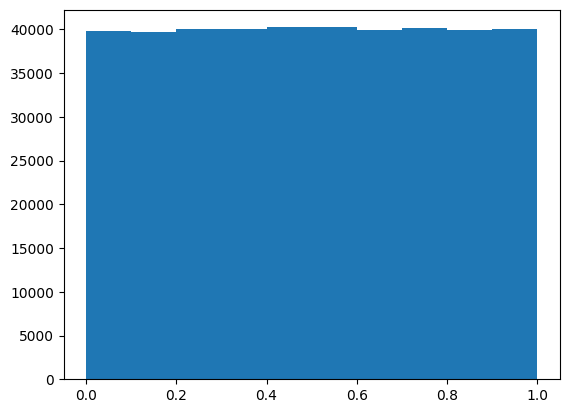

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
samples = np.random.rand(400000)
hist, bins = np.histogram(samples)
print(hist)
plt.hist(samples,bins = bins)

In [ ]:
data_augmented = 3!=2

In [ ]:
if torch.all(label[2,3:5] == label[2,3:5]):
    print('hola')

hola


In [ ]:
for n in label:
    print(n.max())


tensor(1.)
tensor(1.)
tensor(1.)
tensor(0.5454)
tensor(0.7658)
tensor(0.7840)
tensor(0.9977)
tensor(1.)


In [ ]:
_, pred_indices= label.topk(k=2,dim=1)
_, indices = label.topk(k=2,dim=1)
correct = ((pred_indices[:] == indices[:]))
correct

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True]])

In [ ]:
label.topk(k=2,dim=1)


torch.return_types.topk(
values=tensor([[1.0000, 0.0000],
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        [0.5454, 0.4546],
        [0.7658, 0.2342],
        [0.7840, 0.2160],
        [0.9977, 0.0023],
        [1.0000, 0.0000]]),
indices=tensor([[ 1,  0],
        [ 4,  1],
        [ 2,  1],
        [ 2, 11],
        [ 0,  3],
        [ 5,  0],
        [11,  9],
        [ 2,  1]]))

In [ ]:
import torch
import time


# Usando numel()
start_time = time.time()
num_elements = label.shape[0]
elapsed_time_numel = time.time() - start_time

# Usando len()
start_time = time.time()
length = len(label)
elapsed_time_len = time.time() - start_time

print("Número de elementos:", num_elements)
print("Tiempo usando numel():", elapsed_time_numel)
print("Longitud:", length)
print("Tiempo usando len():", elapsed_time_len)

Número de elementos: 8
Tiempo usando numel(): 3.981590270996094e-05
Longitud: 8
Tiempo usando len(): 3.695487976074219e-05


In [ ]:
len(data_new)

1157

In [ ]:
import torch
size = data[0][0].shape
GMM_mask(size,rat=0.3).shape

torch.Size([16, 2, 128, 128])

In [ ]:
l = data_augmented[0]

In [ ]:
np.unique(data[0][0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
      dtype=float32)

In [ ]:
print(l[0].max())

50.0


In [ ]:
data[0][0].shape

(16, 2, 128, 128)

In [ ]:
split_by = 'exp_decay'
print(split_by in ('exp_decay','number','time'))

True


In [ ]:
from spikingjelly.datasets import play_frame
import os
root_gifs = os.path.join(os.getcwd(),'gifs_DailyActions_label0_timedecay_tau0_4')
os.mkdir(root_gifs)

k = 0
for file in data:
    if file[1] == 0:
        play_frame(file[0],save_gif_to=os.path.join(root_gifs,f'data_{k}.gif'))
        k += 1
    if k==29:
        break

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_0.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_1.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_2.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_3.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_4.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_5.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_6.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActio

## DVSAnimals dataset

In [ ]:
data_dvsgesture = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
Laboratory.execute_experiment(inp_data=data_dvsgesture)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.


wandb: Currently logged in as: marcosesgonz (tfm_datcom). Use `wandb login --relogin` to force relogin


Abortar escribiendo exit


Instancias de train:  1176
Instancias de test:  288
Mkdir /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/DVS_Gesture_dataset/T16_b8_lr0.1.
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/DVS_Gesture_dataset/T16_b8_lr0.1
epoch = 0, train_loss = 0.0909, train_acc = 0.0825, test_loss = 0.0909, test_acc = 0.0833, max_test_acc = 0.0833
train speed = 3.8811 images/s, test speed = 7.8287 images/s
escape time = 2023-06-30 23:45:02



In [ ]:
data_animals = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset'
Laboratory.execute_experiment(inp_data=data_animals)

Starting new version
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/frames_number_16_split_by_number] already exists.
Posible labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: marcosesgonz (tfm_datcom). Use `wandb login --relogin` to force relogin


Abortar escribiendo exit


Instancias de train:  896
Instancias de test:  225
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 0, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.4798 images/s, test speed = 5.8741 images/s
escape time = 2023-06-30 22:55:10

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 1, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.5608 images/s, test speed = 6.0359 images/s
escape time = 2023-06-30 22:51:44

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 2, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.5916 images/s, test speed = 6.0760 images/s
escape time = 2023-06-30 22:50:33

/Use

test_acc,▁▁▁▁▁
test_loss,▁▁▁▁▁
train_acc,▁▁▁▁▁
train_loss,▁▁▁▁▁
test_acc,0.05333
test_loss,0.05263
train_acc,0.05246
train_loss,0.05263


KeyboardInterrupt: 

In [ ]:
from spikingjelly.activation_based.model import parametric_lif_net
from spikingjelly.activation_based import functional, surrogate, neuron
import torch

DVS_net = parametric_lif_net.DVSGestureNet(channels=128, spiking_neuron=neuron.LIFNode, surrogate_function=surrogate.ATan(), detach_reset=True)
functional.set_step_mode(DVS_net, 'm')

x = torch.rand(size=[10, 8, 2, 128, 128])
print(DVS_net(x).shape)

torch.Size([10, 8, 22])


## Cargando pesos de red entrenada y abortada en la época 40:

In [ ]:
import torch
w_root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/result_logs/DVS_ActionRecog_dataset/T16_b1_lr0.1/checkpoint_latest.pth'
run_wandb_path = 'tfm_datcom/Experimento1/v8ng5wwx'
k = torch.load(w_root)
k.keys()

dict_keys(['net', 'optimizer', 'lr_scheduler', 'epoch', 'max_test_acc'])

In [ ]:
k['lr_scheduler']

{'T_max': 50,
 'eta_min': 0,
 'base_lrs': [0.1],
 'last_epoch': 46,
 'verbose': False,
 '_step_count': 47,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.0015708419435684518]}